In [128]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [129]:
crop=pd.read_csv('Crop_recommendation.csv')
argi=pd.read_csv('argiculture.csv')
rainfall=pd.read_csv('rainfall in india 1901-2015.csv')
distwise=pd.read_csv('district wise rainfall normal.csv')

In [130]:
crop.head()
# N - ratio of Nitrogen content in soil
# P - ratio of Phosphorous content in soil
# K - ratio of Potassium content in soil

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [132]:
crop['label'].unique() #we are calculating the 22 unique crops 

array(['rice', 'maize', 'chickpea', 'kidneybeans', 'pigeonpeas',
       'mothbeans', 'mungbean', 'blackgram', 'lentil', 'pomegranate',
       'banana', 'mango', 'grapes', 'watermelon', 'muskmelon', 'apple',
       'orange', 'papaya', 'coconut', 'cotton', 'jute', 'coffee'],
      dtype=object)

In [5]:
#taking avrage of crops that are requried 
diff = crop.groupby(['label']).mean()
diff.to_csv('types-of-crop.csv')

In [25]:
df=pd.read_csv('types-of-crop.csv')
df.head()

,label,N,P,K,temperature,humidity,ph,rainfall
0,apple,20.80,134.22,199.89,22.630942,92.333383,5.929663,112.654779
1,banana,100.23,82.01,50.05,27.376798,80.358123,5.983893,104.626980
2,blackgram,40.02,67.47,19.24,29.973340,65.118426,7.133952,67.884151
3,chickpea,40.09,67.79,79.92,18.872847,16.860439,7.336957,80.058977
4,coconut,21.98,16.93,30.59,27.409892,94.844272,5.976562,175.686646


In [7]:
# sns.pairplot(df)

<AxesSubplot:>

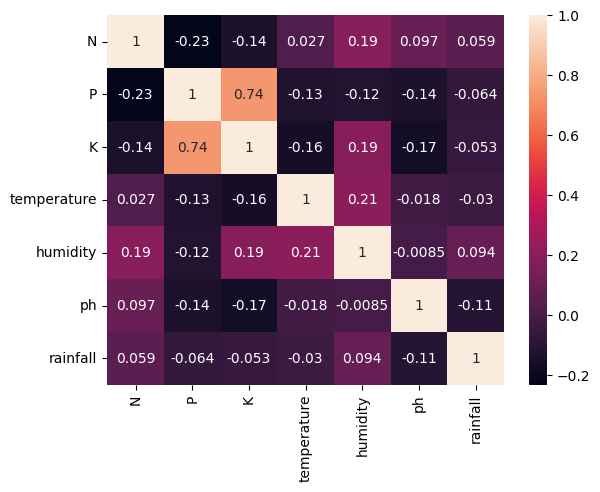

In [133]:
sns.heatmap(crop.corr(),annot=True)

In [181]:
features = crop[['N', 'P','K','temperature', 'humidity', 'ph', 'rainfall']]
target = crop['label']
labels = crop['label']
acc = []
model = []

In [182]:
from sklearn.model_selection import train_test_split
Xtrain, Xtest, Ytrain, Ytest = train_test_split(features,target,test_size = 0.2,random_state =10)

In [183]:
from sklearn.linear_model import LogisticRegression

LogReg = LogisticRegression(random_state=42)

LogReg.fit(Xtrain,Ytrain)

predicted_values = LogReg.predict(Xtest)

x = metrics.accuracy_score(Ytest, predicted_values)
acc.append(x)
model.append('Logistic Regression')
print("Logistic Regression's Accuracy is:", x)

# print(classification_report(Ytest,predicted_values))

Logistic Regression's Accuracy is: 0.9681818181818181


/home/rahul/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [186]:
from sklearn.ensemble import RandomForestClassifier
RF = RandomForestClassifier(n_estimators=20, random_state=42)
RF.fit(Xtrain,Ytrain)
predicted_val = RF.predict(Xtest)
x = metrics.accuracy_score(Ytest, predicted_val)
acc.append(x)
model.append('RF')
print("RF's Accuracy is: ", x)
# print(classification_report(Ytest,predicted_values))

RF's Accuracy is:  0.9931818181818182


array([1., 2., 3., 4., 5., 6., 7., 8., 9.])

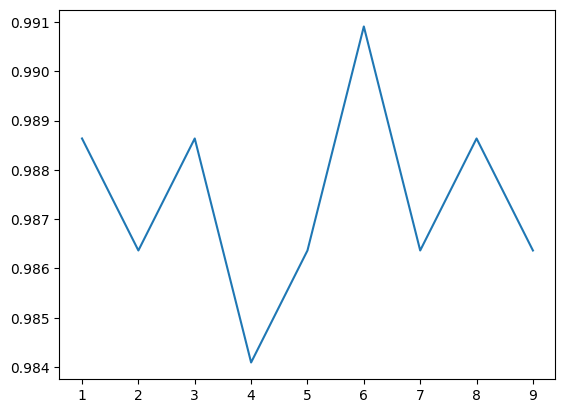

In [226]:
k=[]
y=np.linspace(1,9,9)
for i in range (1,10):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(Xtrain, Ytrain)
    y_pred = knn.predict(Xtest)
    x=metrics.accuracy_score(Ytest, y_pred)
    k.append(x)
plt.plot(y,k)
y

In [227]:
#by graphs we can see that the most accuracy we can get it on when we checking the nearest neignbour to 6
#so
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=6)
knn.fit(Xtrain, Ytrain)
y_pred = knn.predict(Xtest)
x=metrics.accuracy_score(Ytest, y_pred)
acc.append(x)
print("knn Accuracy is: ", x)

knn Accuracy is:  0.990909090909091


In [228]:
knn.predict([[80,90,10,16,80,7,112]])

/home/rahul/.local/lib/python3.10/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


array(['banana'], dtype=object)

In [158]:
RF.predict([[80,90,10,16,80,7,112]])

/home/rahul/.local/lib/python3.10/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


array(['banana'], dtype=object)

In [278]:
LogReg.predict([[80,90,10,16,80,7,112]])
len(LogReg.coef_)

/home/rahul/.local/lib/python3.10/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


22

In [238]:
argi.tail()

,state,district,market,commodity,variety,arrival_date,min_price,max_price,modal_price
2233,West Bengal,Uttar Dinajpur,Islampur,Potato,Jyoti,04/03/2019,530,570,550
2234,West Bengal,Uttar Dinajpur,Islampur,Rice,Other,04/03/2019,3550,3650,3600
2235,West Bengal,Uttar Dinajpur,Raiganj,Jute,TD-5,04/03/2019,4400,4600,4500
2236,West Bengal,Uttar Dinajpur,Raiganj,Rice,Other,04/03/2019,3450,3550,3500
2237,West Bengal,Uttar Dinajpur,Raiganj,Wheat,Kalyan,04/03/2019,2075,2125,2100


In [ ]:
import statsmodels.api as sm
logit_model=sm.Logit(y1,x1)
result=logit_model.fit()

In [260]:
argi['commodity'].unique()

array(['Amaranthus', 'Banana - Green', 'Bhindi(Ladies Finger)',
       'Bitter gourd', 'Black pepper', 'Bottle gourd', 'Brinjal',
       'Cabbage', 'Carrot', 'Cauliflower', 'Cluster beans', 'Coconut',
       'Colacasia', 'Onion', 'Potato', 'Tomato',
       'Bengal Gram(Gram)(Whole)', 'Jowar(Sorghum)',
       'Paddy(Dhan)(Common)', 'Lentil (Masur)(Whole)', 'Rice',
       'Cucumbar(Kheera)', 'Field Pea', 'French Beans (Frasbean)',
       'Green Chilli', 'Knool Khol', 'Pumpkin', 'Raddish',
       'Black Gram (Urd Beans)(Whole)', 'Green Gram (Moong)(Whole)',
       'Jute', 'Maida Atta', 'Mustard', 'Wheat Atta', 'Garlic',
       'Masur Dal', 'Ridgeguard(Tori)', 'Arecanut(Betelnut/Supari)',
       'Arhar (Tur/Red Gram)(Whole)', 'Maize', 'Dry Chillies',
       'Groundnut', 'Capsicum', 'Guar', 'Lemon',
       'Bajra(Pearl Millet/Cumbu)', 'Castor Seed', 'Coriander(Leaves)',
       'Cowpea(Veg)', 'Drumstick', 'Elephant Yam (Suran)',
       'Ginger(Green)', 'Indian Beans (Seam)', 'Methi(Leaves)',

In [239]:
argi.

,min_price,max_price,modal_price
min_price,1.000000,0.975526,0.985341
max_price,0.975526,1.000000,0.994260
modal_price,0.985341,0.994260,1.000000


In [257]:
season_rain=distwise.groupby(['STATE_UT_NAME','DISTRICT']).mean()
season_rain.head()

JAN   FEB   MAR    APR    MAY  \
STATE_UT_NAME               DISTRICT                                         
ANDAMAN And NICOBAR ISLANDS N & M ANDAMAN   32.7  15.9   8.6   53.4  343.6   
                            NICOBAR        107.3  57.9  65.2  117.0  358.5   
                            SOUTH ANDAMAN   43.7  26.0  18.6   90.5  374.4   
ANDHRA PRADESH              ADILABAD         7.5   7.0  11.4   11.9   18.2   
                            ANANTAPUR        3.0   3.3   6.1   18.9   56.7   

                                             JUN    JUL    AUG    SEP    OCT  \
STATE_UT_NAME               DISTRICT                                           
ANDAMAN And NICOBAR ISLANDS N & M ANDAMAN  503.3  465.4  460.9  454.8  276.1   
                            NICOBAR        295.5  285.0  271.9  354.8  326.0   
                            SOUTH ANDAMAN  457.2  421.3  423.1  455.6  301.2   
ANDHRA PRADESH              ADILABAD       178.4  317.4  291.7  171.4   83.0   
                            ANANTAPUR       55.2   64.3   74.5  128.8  115.0   

                                             NOV    DEC  ANNUAL  Jan-Feb  \
STATE_UT_NAME               DISTRICT                                       
ANDAMAN And NICOBAR ISLANDS N & M ANDAMAN  198.6  100.0  2913.3     48.6   
                            NICOBAR        315.2  250.9  2805.2    165.2   
                            SOUTH ANDAMAN  275.8  128.3  3015.7     69.7   
ANDHRA PRADESH              ADILABAD        14.8    7.3  1120.0     14.5   
                            ANANTAPUR       35.3   11.6   572.7      6.3   

                                           Mar-May  Jun-Sep  Oct-Dec  
STATE_UT_NAME               DISTRICT                                  
ANDAMAN And NICOBAR ISLANDS N & M ANDAMAN    405.6   1884.4    574.7  
                            NICOBAR          540.7   1207.2    892.1  
                            SOUTH ANDAMAN    483.5   1757.2    705.3  
ANDHRA PRADESH              ADILABAD          41.5    958.9    105.1  
                            ANANTAPUR         81.7    322.8    161.9

In [259]:
season_rain=season_rain[['Jan-Feb','Mar-May','Jun-Sep','Oct-Dec','ANNUAL']]
season_rain.head()

Jan-Feb  Mar-May  Jun-Sep  Oct-Dec  \
STATE_UT_NAME               DISTRICT                                            
ANDAMAN And NICOBAR ISLANDS N & M ANDAMAN     48.6    405.6   1884.4    574.7   
                            NICOBAR          165.2    540.7   1207.2    892.1   
                            SOUTH ANDAMAN     69.7    483.5   1757.2    705.3   
ANDHRA PRADESH              ADILABAD          14.5     41.5    958.9    105.1   
                            ANANTAPUR          6.3     81.7    322.8    161.9   

                                           ANNUAL  
STATE_UT_NAME               DISTRICT               
ANDAMAN And NICOBAR ISLANDS N & M ANDAMAN  2913.3  
                            NICOBAR        2805.2  
                            SOUTH ANDAMAN  3015.7  
ANDHRA PRADESH              ADILABAD       1120.0  
                            ANANTAPUR       572.7

In [266]:
state_wise=season_rain.groupby('STATE_UT_NAME').mean()
state_wise

,Jan-Feb,Mar-May,Jun-Sep,Oct-Dec,ANNUAL
STATE_UT_NAME,,,,,
ANDAMAN And NICOBAR ISLANDS,94.500000,476.600000,1616.266667,724.033333,2911.400000
ANDHRA PRADESH,13.673913,78.734783,639.534783,213.130435,945.073913
ARUNACHAL PRADESH,146.981250,740.443750,1784.037500,255.912500,2927.375000
ASSAM,47.448148,592.900000,1641.200000,172.811111,2454.359259
BIHAR,22.413158,78.413158,1022.478947,77.250000,1200.555263
CHANDIGARH,83.200000,78.100000,844.200000,65.100000,1070.600000
CHATISGARH,20.850000,43.577778,1145.772222,76.150000,1286.350000
DADAR NAGAR HAVELI,0.700000,7.400000,2316.900000,49.100000,2374.100000
DAMAN AND DUI,1.050000,4.450000,1481.800000,48.400000,1535.700000


In [280]:
selected_state=distwise['STATE_UT_NAME'].unique()

In [282]:
distwise[distwise['STATE_UT_NAME'] == 'RAJASTHAN']

,STATE_UT_NAME,DISTRICT,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL,Jan-Feb,Mar-May,Jun-Sep,Oct-Dec
370,RAJASTHAN,BARMER,1.2,1.7,2.3,3.2,9.1,27.4,88.6,86.7,40.7,4.1,3.2,0.4,268.6,2.9,14.6,243.4,7.7
371,RAJASTHAN,BIKANER,4.1,7.8,5.7,4.1,14.3,29.2,85.7,74.6,39.2,4.4,2.5,2.4,274.0,11.9,24.1,228.7,9.3
372,RAJASTHAN,CHURU,6.2,7.4,6.3,4.9,16.4,37.7,126.6,101.7,47.7,9.9,2.4,2.4,369.6,13.6,27.6,313.7,14.7
373,RAJASTHAN,SRI GANGANAGA,6.0,8.0,9.3,7.0,11.6,25.5,79.3,64.9,31.7,3.1,2.1,4.4,252.9,14.0,27.9,201.4,9.6
374,RAJASTHAN,JAISALMER,1.7,2.9,2.2,3.8,6.6,19.4,59.3,56.9,22.8,3.1,1.5,1.0,181.2,4.6,12.6,158.4,5.6
375,RAJASTHAN,JALORE,1.8,1.1,2.6,1.4,8.2,34.5,161.1,132.2,66.4,9.2,7.6,1.0,427.1,2.9,12.2,394.2,17.8
376,RAJASTHAN,JODHPUR,2.9,3.1,2.7,5.2,11.1,27.9,109.5,94.6,42.5,4.9,2.7,1.0,308.1,6.0,19.0,274.5,8.6
377,RAJASTHAN,NAGAUR,4.1,5.5,2.7,4.7,15.3,42.5,142.6,116.0,47.4,7.9,2.6,2.8,394.1,9.6,22.7,348.5,13.3
378,RAJASTHAN,PALI,3.7,2.5,2.9,2.7,9.5,41.9,177.3,152.9,74.6,11.9,4.6,1.2,485.7,6.2,15.1,446.7,17.7
379,RAJASTHAN,HANUMANGARH,7.5,8.6,5.7,4.9,13.0,32.2,103.4,83.4,33.5,3.4,3.6,2.4,301.6,16.1,23.6,252.5,9.4


In [286]:
val=distwise[distwise['DISTRICT']=='ALWAR']

381    215.3
Name: AUG, dtype: float64